# Exercise  2 - LTI systems

## Objectives
- To investigate properties of LTI systems
- To learn about the different representations of LTI systems
- To understand the concept of convolution


In [14]:
import os
os.makedirs('results/ex2', exist_ok=True)

## Lab Exercise

### Impulse response representation
<img src="img/ex2b_1.svg" alt="Drawing" style="width: 900px;"/>
<center>Figure 2.1: Impulse response of a LTI system</center>

Suppose we apply a unit impulse function, $\delta[n]$, as an input to a Linear Time-Invariant (LTI) system. The output is the impulse response of the digital system, $h[n]$, as shown  in  Fig. 2.1. Since the discrete-time system is time-invariant, the filter response to $\delta[n-k]$ is $h[n-k]$. 

In general, any input signal $x[n]$ can be decomposed into signal values at each time sample, i.e.

$$ x[n]=\big[x[0]\delta[n], {x[1]\delta[n-1]}, \cdots, {x[N]\delta[n-N]}\big]$$
Consequently, the filter output is 

$$\boldsymbol{y}[n]=x[0]h[n]+x[1]{h[n-1]}+\cdots+x[N]{h[n-N]}.$$

This is defined as **linear convolution**.

#### Example
Consider a sequence of unit impulses of length $(N+1)$ as the input, $\big[\delta[n],{\delta[n-1]},\cdots,{\delta[n-N]}\big]$. Due to linearity, the response of the digital filter will be the sum of the outputs i.e. $y[n]=h[n]+{h[n-1]}+\cdots+{h[n-N]}$. 

<img src="img/ex5_2.svg" alt="Drawing" style="width: 900px;"/>
<center>Figure 2.2: Linear convolution in time domain</center>

---
####  Definition
$$\text{Linear Convolution: }y[n]=x[n]*h[n]\overset{\Delta}{=}\sum^\infty_{k=-\infty}x[k]h[n-k]$$

---

If we substitute $r$ for $n-k$ this becomes:
$$y[n]=\sum_{r=-\infty}^{\infty}h[r]x[n-r]$$

Thus, for any linear time-invariant (LTI) filter, the output values consist of the sum of the past input values, weighted by the elements of the impulse response $h[n]$. This has been shown in Fig. 2.2. 

**Question 2.1** What information is needed in order to compute the output of a discrete-time LTI system?


>**Answer 2.1** In order to compute output of a discrete time LTI system, we need to know the form of the input signal as well as the system response $h[n]
$


**Question 2.2** Implement a linear convolution using your own `my_conv` function in the cell below. Verify that it gives you the correct result using the example in Fig 2.2.
> **GTA Tip**
>
> - The length of `y` is always `len(x)+len(h)-1`.
> - You can shift all elements of the array `x` by `nshift` elements using `np.roll(x,nshift)`.
> - You can multiply all elements of the array `x` by a scalar `c` using `x*c`.
> - You can verify that your implementation is correct by using the `np.convolve()` function.

>**NOTE:** We can try matrix multiplication since it will output the convolved output signal, it just requires the matrix impulse matrix to be created first 

In [15]:
import numpy as np

def my_conv(input, response):
    output = np.zeros((len(input)+len(response)-1)) # This is always true
    X = np.append(input, np.zeros(len(response)-1)) # append H with zeros so that len(H)=len(y)
    H = np.append(response, np.zeros(len(input)-1)) # append X with zeros so that len(X)=len(y)
    
    for i in range(len(X)):
        # xi_contribution = X[i] * H
        xi_contribution = np.roll(X[i] * H, i) 
        output = np.add(output, xi_contribution)
    
    return output

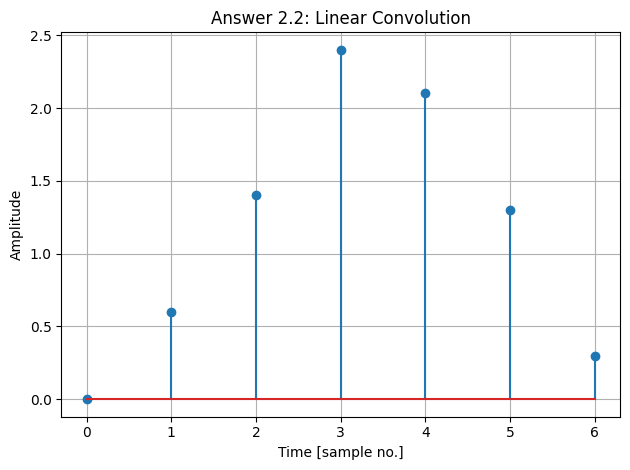

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from functions.lab_functions import plot_signal

x = [0,1,1,1] # this is the example in Fig 2.2
h = [0.6, 0.8, 1, 0.3] # this is the example in Fig 2.2

y = my_conv(x,h)

plt = plot_signal(y, title='Answer 2.2: Linear Convolution', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
# plt.savefig('results/ex2/ex2_linear_convolution.pdf')
plt.show()

**Question 2.3** What will the output `y` be if you change `x` to `[0,0,0,1,1,1]`? Check your answer using `my_conv`.

>**Answer 2.3:** The output signal will be shifted two time units to the right as the first two zeros in `x` will output zero when convolved with the impulse function 

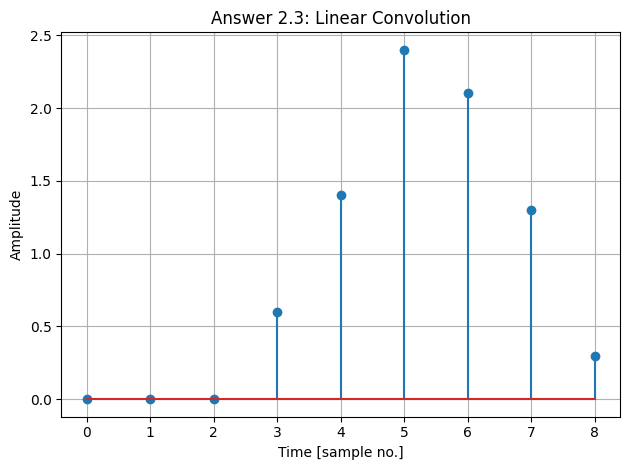

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from functions.lab_functions import plot_signal

x = [0, 0, 0,1,1,1] # this is the example in Fig 2.2
h = [0.6, 0.8, 1, 0.3] # this is the example in Fig 2.2

y = my_conv(x,h)

plt = plot_signal(y, title='Answer 2.3: Linear Convolution', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
# plt.savefig('results/ex2/ex2_linear_convolution.pdf')
plt.show()

**Question 2.4** Similarly, what will the output `y` be if you change `x` to `[0, 2, 2, 2]`?

>**Answer 2.4** The output function will of the same form as the original output, but upscaled by a factor 2

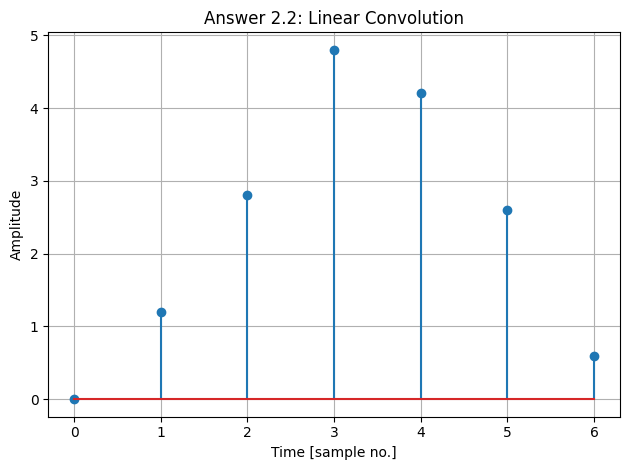

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from functions.lab_functions import plot_signal

x = [0,2,2,2] # this is the example in Fig 2.2
h = [0.6, 0.8, 1, 0.3] # this is the example in Fig 2.2

y = my_conv(x,h)

plt = plot_signal(y, title='Answer 2.2: Linear Convolution', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
# plt.savefig('results/ex2/ex2_linear_convolution.pdf')
plt.show()

### Difference equation representation

You have seen in lectures that discrete-time LTI systems can also be represented using difference equations, i.e.
$$ \sum_{k=0}^N a_ky[n-k]=\sum_{k=0}^{M}b_k x[n-k]$$
where $a_k$ and $b_k$ are constant coefficients. This forms shows how the output at time $n$, $y[n]$, can be obtained as a weighted sum of past outputs and past and present inputs to the system.

**Question 2.5** Given a system with $a_0=1$, $a_1=-0.25$, $b_0=1$ and all other coefficients zero, write its difference equation.

>**Answer 2.5** With the above difference equation, we can write this equation in the same form:
>
>$$ y[n] - \frac{1}{4}y[n-1] = x[n]$$
>Which can be rearranged to give:
>$$ y[n] = x[n] + \frac{1}{4}y[n-1]$$
>Thus suggesting that output consists of the weighted sum of the input and the past output
>

**Question 2.6** Compute the output the system for $x[n]=\delta[n]$ using Python. Calculate $N=5$ output values and assume zero initial conditions. What is the function that you obtain?

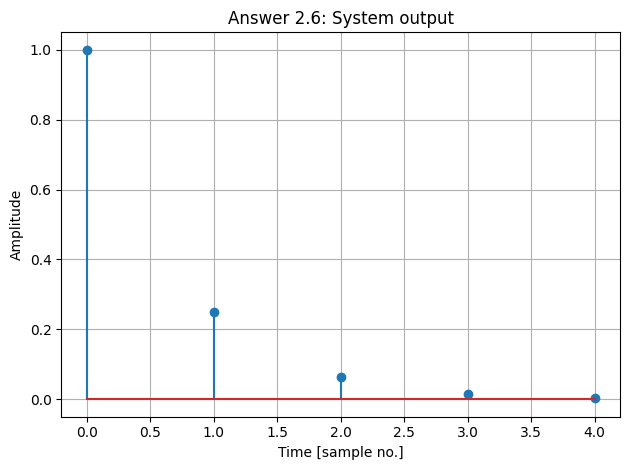

In [19]:
N = 5
ic = 0 # initial condition zero
y = []
x = np.concatenate((np.ones(1), np.zeros(N-1)))
for i in range(N):
    # add code here
    if i < 1:
        y.append(x[i])
    else:
        cur_y = x[i] + y[i-1]/4
        y.append(cur_y)

plt = plot_signal(y, title='Answer 2.6: System output', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
plt.savefig('results/ex2/ex2_difference_equation.pdf')
plt.show()

**Question 2.7** Increase the value of $N$ to i) 10, ii) 50 iii) 100 and examine the last value of `y` using `print(y[N-1])`. What can you say about this system?

In [20]:
# Putting the code into a callable function for simplicity
def get_output(N):
    ic = 0 # initial condition zero
    y = []
    x = np.concatenate((np.ones(1), np.zeros(N-1)))
    for i in range(N):
        # add code here
        if i < 1:
            y.append(x[i])
        else:
            cur_y = x[i] + y[i-1]/4
            y.append(cur_y)
            
    return y

In [21]:
y0 = get_output(10)
y1 = get_output(50)
y2 = get_output(100)

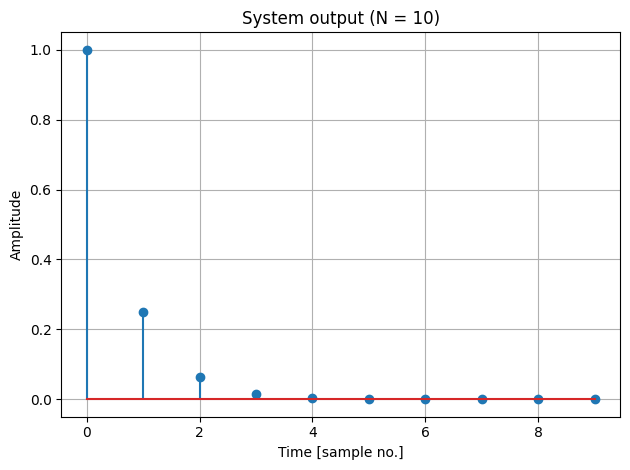

In [22]:
# N = 10
plt = plot_signal(y0, title='System output (N = 10)', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
plt.show()

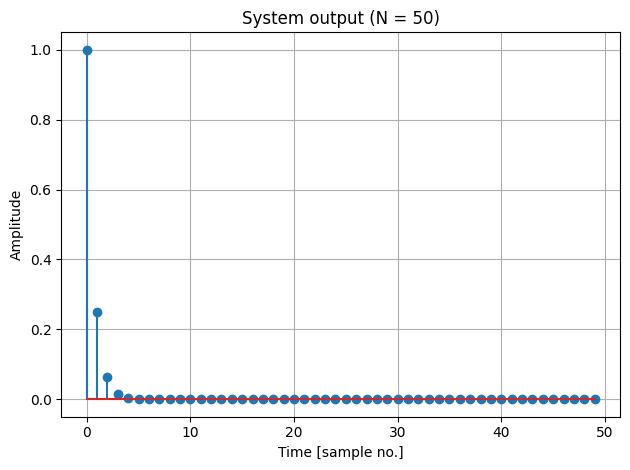

In [23]:
# N = 50
plt = plot_signal(y1, title='System output (N = 50)', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
plt.show()

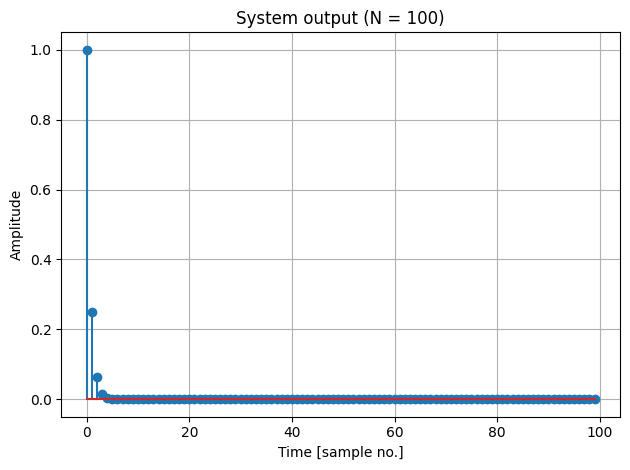

In [24]:
# N = 100
plt = plot_signal(y2, title='System output (N = 100)', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
plt.show()

>**Answer 2.7** Based on the three graphs and increasing the number of time samples, we can see that the system is time invariant

**Question 2.8** Change your code to have $x[n]=0$ and $y[-1]=2$. Compare your plot to Exercise 12 of Problem Sheet 2.

In [25]:
def get_output(N):
    ic = 0 # initial condition zero
    y = []
    x = np.zeros(N)
    for i in range(N):
        # add code here
        if i < 1:
            cur_y = x[i] + 2/4
            y.append(cur_y)
        else:
            cur_y = x[i] + y[i-1]/4
            y.append(cur_y)
            
    return y

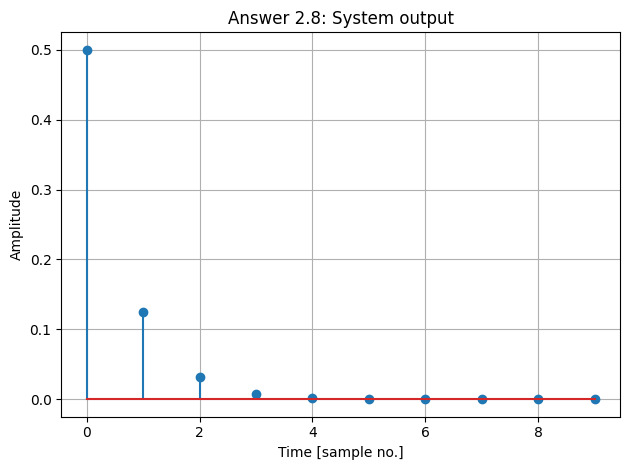

In [26]:
y_new = get_output(10)
plt = plot_signal(y_new, title='Answer 2.8: System output', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
# plt.savefig('results/ex2/ex2_difference_equation.pdf')
plt.show()